# DSCI 631 Project Proposal: Loan Repayment Prediction

### Introduction

In the domain of financial lending, accurately predicting loan repayment is a critical task for financial institutions. This project aims to develop a loan repayment system that utilizes machine learning algorithms to predict the risk of loan default and manage repayment processes effectively.

### Team Members

Rohit Annasaheb Ragde (rar369@drexel.edu) is currently in the final quarter of his master's degree in Computer Science at Drexel University. With a solid foundation in computer engineering from his undergraduate studies, Rohit brings two years of practical experience as a Database Administrator for a data warehousing company.Adaptable and goal-oriented, Rohit thrives in collaborative environments and excels in team settings. His expertise spans across various tools, including Microsoft Excel, Python, and Jupyter, which he has utilized extensively for data analysis and aggregation.Rohit is eager to apply his newly acquired Python skills to conduct robust data analysis for this project. He eagerly anticipates the opportunity to collaborate with fellow team members, fostering an environment of continuous learning and skill enhancement.

Disha Yadav (dcy26@drexel.edu) is an industrious master’s student in Computer Science at Drexel University, committed to expanding her expertise in the field. With a robust foundation in Computer Science & Engineering from her undergraduate studies, Disha honed her skills as a Full Stack Web Developer during her B.Tech internship, enriching her practical knowledge.Motivated by her curiosity, Disha has actively explored programming frameworks in R and Python, striving to grasp their fundamental principles. Proficient in Python and Jupyter, she has adeptly employed these tools for extensive data analysis and exploration. Disha is eager to contribute her technical prowess in Python, Jupyter, and machine learning to facilitate data processing and interpretation within the group, aiming to achieve project objectives collaboratively. She eagerly looks forward to engaging with her peers, furthering her knowledge, and making meaningful contributions to the field.


### Goal

Our main goal is to develop a loan repayment system utilizing machine learning techniques to accurately predict the risk of loan default and enhance repayment processes within the financial lending domain. This project will leverage Python  as primary tool to achieve effective management of loan portfolios and informed decision-making for financial institutions

### Data

The dataset chosen for this project provides information relevant to loan repayment prediction. It includes various features associated with loan applications, such as applicant characteristics, financial details, credit history, and property information. Sourced from a loan lender website, the dataset comprises 614 entries, each representing a loan application. It is provided alongside the project proposal for analysis and prediction


### **Data Preparation & Pre-Proccessing**

The dataset contains 13 columns and 614 records.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
df = pd.read_csv('data/loan_dataset.csv')

In [7]:
print(f"Shape of input dataframe is: {df.shape}")
df.head()

Shape of input dataframe is: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
print(f"Dataset Columns:\n{df.columns}")

Dataset Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### **Exploratory Data Analysis**

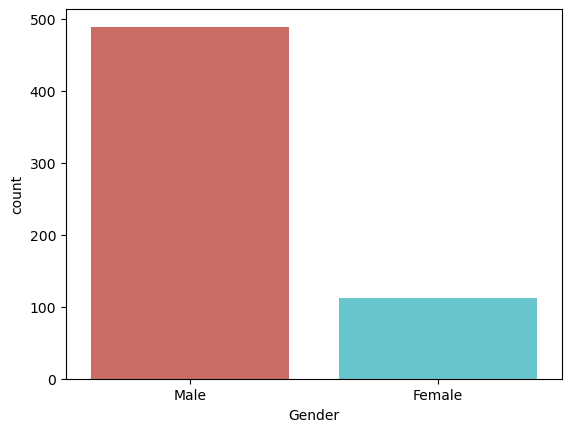

In [14]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

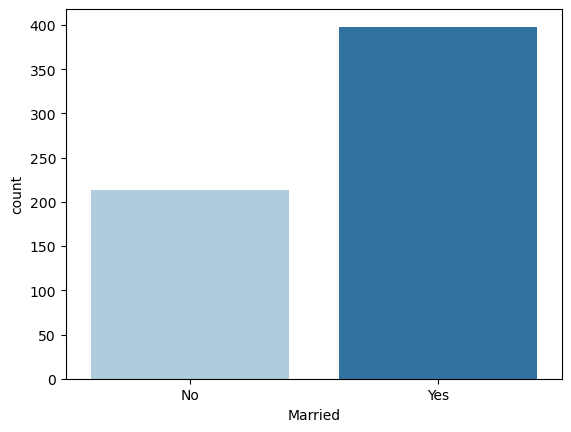

In [15]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

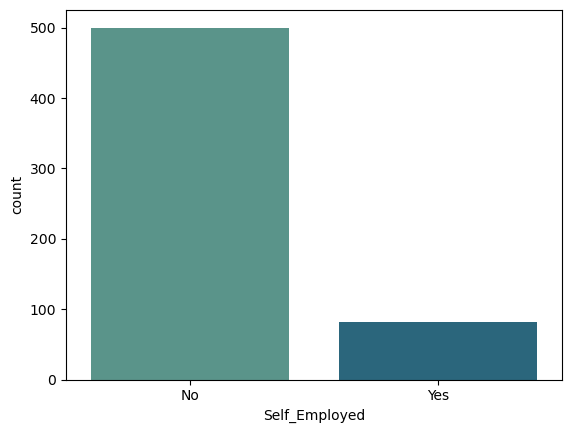

In [16]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

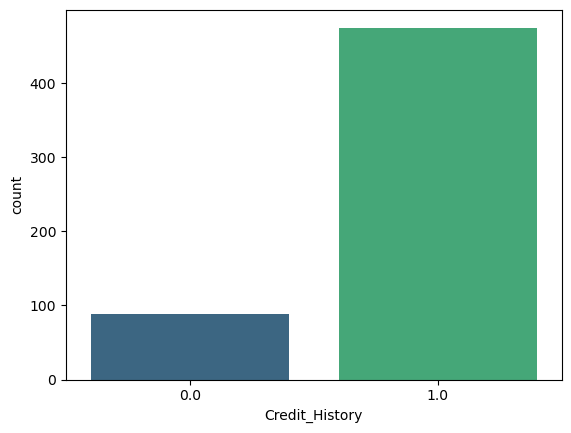

In [17]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [18]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


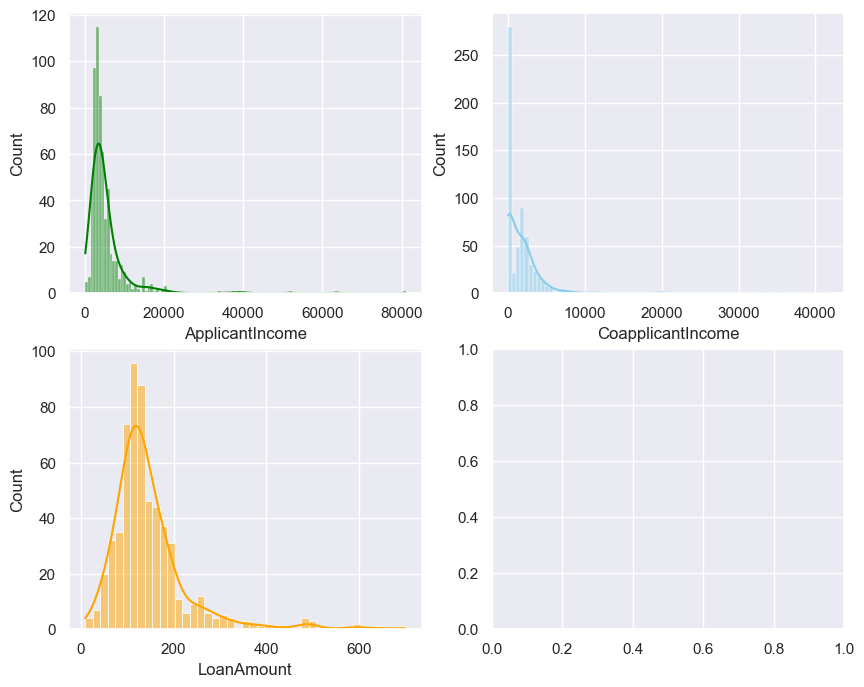

In [19]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

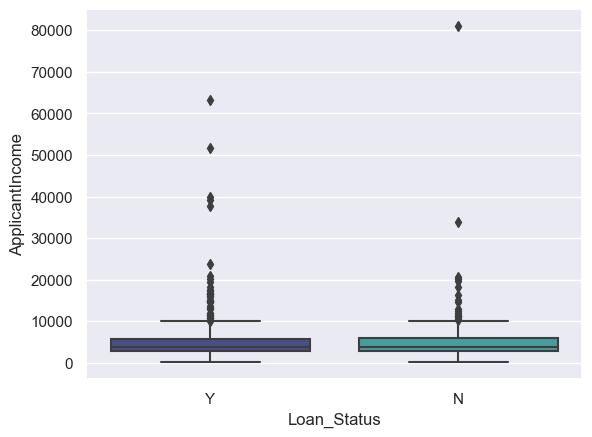

In [20]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

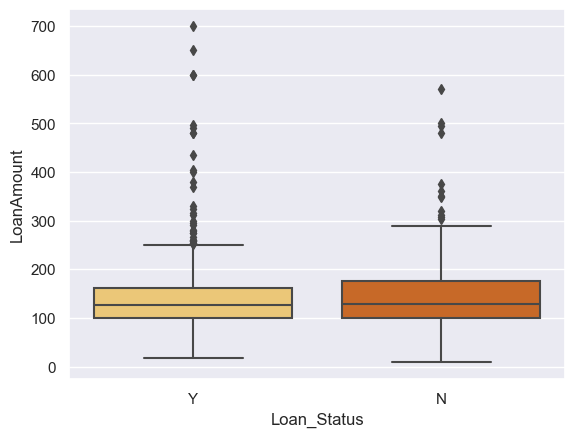

In [21]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

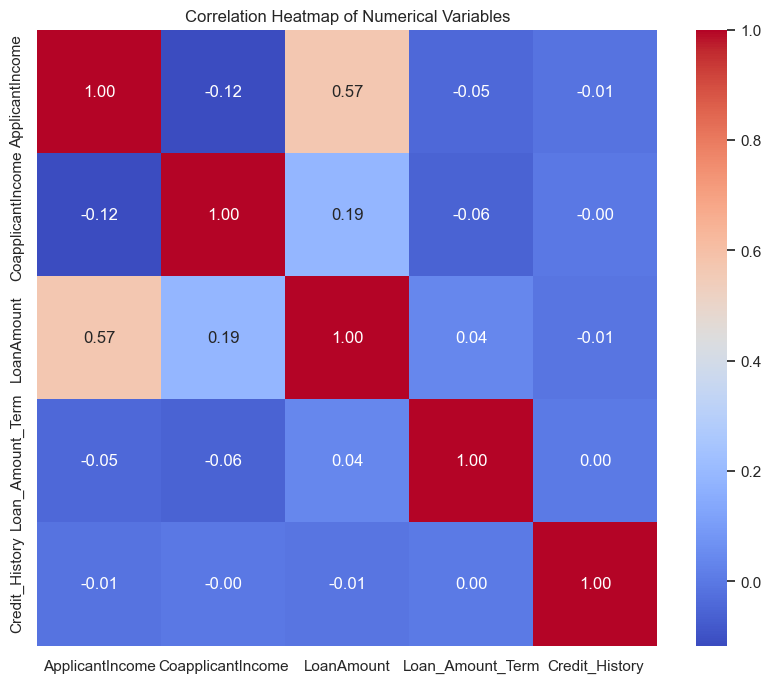

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame stored in df
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


# Observations:

Look for dark red areas close to 1.0 on the color scale. These represent strong positive correlations.
In this heatmap, there seems to be a strong positive correlation between ApplicantIncome and LoanAmount. This suggests that people with higher incomes tend to apply for larger loans.
There also appears to be a positive correlation between CoapplicantIncome and LoanAmount. This makes sense because a higher combined income would likely strengthen the loan application.
#Strong Negative Correlations:

Look for dark blue areas close to -1.0 on the color scale. These represent strong negative correlations.
There seems to be a negative correlation between Credit_History and LoanAmount. This aligns with the expectation that people with a lower credit history might receive smaller loans or get rejected.
#Weak Correlations:

Areas with colors closer to white or 0.0 on the color scale indicate weak correlations. These variables might not have a significant influence on each other.
It appears there might be weak correlations between Loan_Amount_Term and other numerical variables like ApplicantIncome or LoanAmount.

### **Algorithms intended to apply**

According to the description of the datasets, pre-processing was already completed. Therefore, our next steps are to just prepare and pass the data into the models that we want to predict.

We are intended to implement Logistic Regression, k Nearest Neighbours ( KNN) and SVM/Random Forest algorithms for prediction of the loan repayment

**Logistic regression** is a statistical method used for predicting the probability of a binary outcome. In the context of loan repayment prediction, logistic regression can be used to model the probability of a loan being repaid or defaulted.

**K-nearest neighbors** is a non-parametric method used for classification and regression tasks. It works by finding the K nearest data points to a given query point and predicting the output based on the majority class or the average value of the neighbors.

**Random Forest** is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. Each decision tree is trained on a random subset of the data, and the final prediction is made by averaging the predictions of all trees.